# Purpose<a href="#Purpose" class="anchor-link">¶</a>

The purposes of this exercise to look into different features to observe
their relationship, and plot a multiple linear regression based on
several features of individual such as age, body mass index (bmi),
gender etc to be used for predicting future medical expenses of
individuals that help medical insurance to make decision on charging the
premium.

# Predicting Insurance Premiums<a href="#Predicting-Insurance-Premiums" class="anchor-link">¶</a>

Our simple dataset contains a few attributes for each person such as
Age, Sex, BMI, Children, Smoker, Region and their charges

# Aim<a href="#Aim" class="anchor-link">¶</a>

To use this info to predict charges for new customers

## We are going to import the data into Python<a href="#We-are-going-to-import-the-data-into-Python" class="anchor-link">¶</a>

In \[2\]:

    import numpy as np
    import pandas as pd
    #import os
    import matplotlib.pyplot as plt
    %matplotlib inline

    #os.chdir() method in Python used to change the current working directory to specified path.
    #os.chdir("path where you want the input file to reside")
    insurance = pd.read_csv("insurance.csv")

    # Preview our data
    insurance.head()

Out\[2\]:

|     | age | sex    | bmi    | children | smoker | region    | charges     |
|-----|-----|--------|--------|----------|--------|-----------|-------------|
| 0   | 19  | female | 27.900 | 0        | yes    | southwest | 16884.92400 |
| 1   | 18  | male   | 33.770 | 1        | no     | southeast | 1725.55230  |
| 2   | 28  | male   | 33.000 | 3        | no     | southeast | 4449.46200  |
| 3   | 33  | male   | 22.705 | 0        | no     | northwest | 21984.47061 |
| 4   | 32  | male   | 28.880 | 0        | no     | northwest | 3866.85520  |

### Observations: Here charges are our dependent variable, and we are going to predict it using the features (independent variables) like age, sex, bmi etc.<a href="#Observations:-Here-charges-are-our-dependent-variable,-and-we-are-going-to-predict-it-using-the-features-(independent-variables)-like-age,-sex,-bmi-etc." class="anchor-link">¶</a>

### We can see that there are some categorical variables like sex, smoker, region; hence we are going to create dummy variables for them.<a href="#We-can-see-that-there-are-some-categorical-variables-like-sex,-smoker,-region;-hence-we-are-going-to-create-dummy-variables-for-them." class="anchor-link">¶</a>

In \[3\]:

    # Showing the properties of different variables
    insurance.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1338 entries, 0 to 1337
    Data columns (total 7 columns):
     #   Column    Non-Null Count  Dtype  
    ---  ------    --------------  -----  
     0   age       1338 non-null   int64  
     1   sex       1338 non-null   object 
     2   bmi       1338 non-null   float64
     3   children  1338 non-null   int64  
     4   smoker    1338 non-null   object 
     5   region    1338 non-null   object 
     6   charges   1338 non-null   float64
    dtypes: float64(2), int64(2), object(3)
    memory usage: 73.3+ KB

## Missing values<a href="#Missing-values" class="anchor-link">¶</a>

### Observations: we don't have any missing values in the data<a href="#Observations:-we-don&#39;t-have-any-missing-values-in-the-data" class="anchor-link">¶</a>

In \[4\]:

    insurance.isnull().sum()

Out\[4\]:

    age         0
    sex         0
    bmi         0
    children    0
    smoker      0
    region      0
    charges     0
    dtype: int64

## Correlation<a href="#Correlation" class="anchor-link">¶</a>

### Observations: we don't have any alarming correlation among the independent variables. We will check it once again using vif, though.<a href="#Observations:-we-don&#39;t-have-any-alarming-correlation-among-the-independent-variables.-We-will-check-it-once-again-using-vif,-though." class="anchor-link">¶</a>

In \[5\]:

    insurance.corr()

Out\[5\]:

|          | age      | bmi      | children | charges  |
|----------|----------|----------|----------|----------|
| age      | 1.000000 | 0.109272 | 0.042469 | 0.299008 |
| bmi      | 0.109272 | 1.000000 | 0.012759 | 0.198341 |
| children | 0.042469 | 0.012759 | 1.000000 | 0.067998 |
| charges  | 0.299008 | 0.198341 | 0.067998 | 1.000000 |

## Univariate analysis<a href="#Univariate-analysis" class="anchor-link">¶</a>

In \[6\]:

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
    insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
    insurance.plot(kind="hist", y="children", bins=6, color="green", ax=axes[1][0])
    insurance.plot(kind="hist", y="charges", bins=100, color="orange", ax=axes[1][1])
    #plt.show()

Out\[6\]:

    <AxesSubplot:ylabel='Frequency'>

<img src="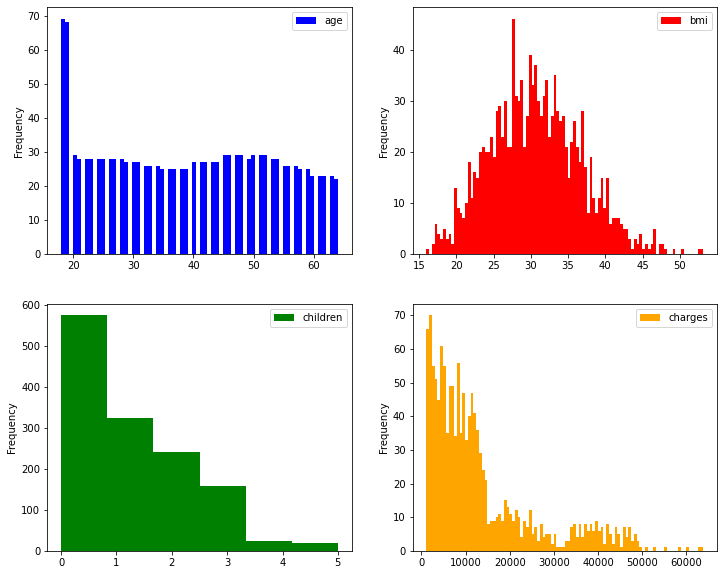%0A" class="jp-needs-light-background" />

### Observations: We can see that all these variables are having variations. BMI seems to be almost a normally distributed.<a href="#Observations:-We-can-see-that-all-these-variables-are-having-variations.-BMI-seems-to-be-almost-a-normally-distributed." class="anchor-link">¶</a>

## Bivariate analysis<a href="#Bivariate-analysis" class="anchor-link">¶</a>

In \[7\]:

    import seaborn as sns  # Imorting Seaborn library
    sns.scatterplot(x="bmi", y="charges", data=insurance, hue='smoker')

Out\[7\]:

    <AxesSubplot:xlabel='bmi', ylabel='charges'>

<img src="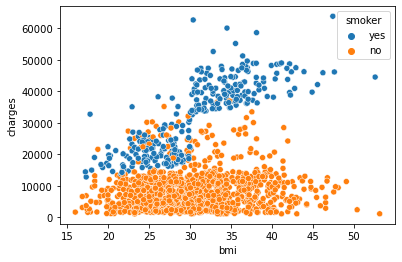%0A" class="jp-needs-light-background" />

### Observations: It's pretty clear that smokers are paying a higher premium than non-smokers. BMI doesn't seem to impacting the charges much.<a href="#Observations:-It&#39;s-pretty-clear-that-smokers-are-paying-a-higher-premium-than-non-smokers.-BMI-doesn&#39;t-seem-to-impacting-the-charges-much." class="anchor-link">¶</a>

## Bivariate analysis - Pair plot<a href="#Bivariate-analysis---Pair-plot" class="anchor-link">¶</a>

### We are creating a pair plot and showing the impacts of smoker and non smokers on different variables<a href="#We-are-creating-a-pair-plot-and-showing-the-impacts-of-smoker-and-non-smokers-on-different-variables" class="anchor-link">¶</a>

In \[8\]:

    import seaborn as sns
    sns.pairplot(insurance, hue="smoker")
    plt.title("Smokers")

Out\[8\]:

    Text(0.5, 1.0, 'Smokers')

<img src="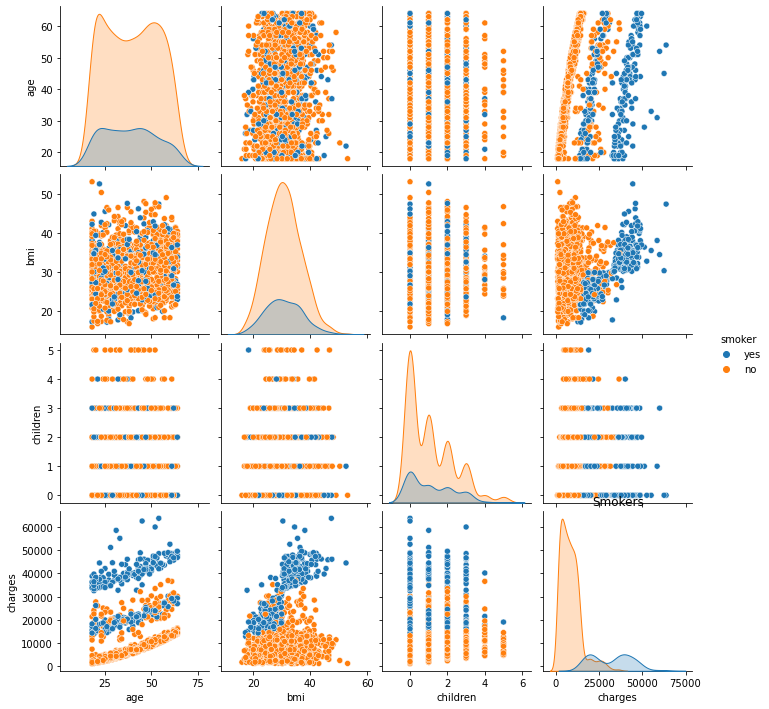%0A" class="jp-needs-light-background" />

# Preparing Data for Machine Learning Algorithms<a href="#Preparing-Data-for-Machine-Learning-Algorithms" class="anchor-link">¶</a>

In \[9\]:

    insurance.head()

Out\[9\]:

|     | age | sex    | bmi    | children | smoker | region    | charges     |
|-----|-----|--------|--------|----------|--------|-----------|-------------|
| 0   | 19  | female | 27.900 | 0        | yes    | southwest | 16884.92400 |
| 1   | 18  | male   | 33.770 | 1        | no     | southeast | 1725.55230  |
| 2   | 28  | male   | 33.000 | 3        | no     | southeast | 4449.46200  |
| 3   | 33  | male   | 22.705 | 0        | no     | northwest | 21984.47061 |
| 4   | 32  | male   | 28.880 | 0        | no     | northwest | 3866.85520  |

## Dummy Variable creation<a href="#Dummy-Variable-creation" class="anchor-link">¶</a>

### We can see that we have few categorical variables like sex, smoker, region. Hence we need to create dummy variables for them.<a href="#We-can-see-that-we-have-few-categorical-variables-like-sex,-smoker,-region.-Hence-we-need-to-create-dummy-variables-for-them." class="anchor-link">¶</a>

In \[10\]:

    insurance=pd.get_dummies(data=insurance,columns=['sex', 'smoker',"region"],drop_first=True)

## All the dummy variables have been properly created<a href="#All-the-dummy-variables-have-been-properly-created" class="anchor-link">¶</a>

In \[11\]:

    insurance.head(3)

Out\[11\]:

|     | age | bmi   | children | charges    | sex_male | smoker_yes | region_northwest | region_southeast | region_southwest |
|-----|-----|-------|----------|------------|----------|------------|------------------|------------------|------------------|
| 0   | 19  | 27.90 | 0        | 16884.9240 | 0        | 1          | 0                | 0                | 1                |
| 1   | 18  | 33.77 | 1        | 1725.5523  | 1        | 0          | 0                | 1                | 0                |
| 2   | 28  | 33.00 | 3        | 4449.4620  | 1        | 0          | 0                | 1                | 0                |

# Data split<a href="#Data-split" class="anchor-link">¶</a>

### Segregating the independent variables as X and dependent variable as y<a href="#Segregating-the-independent-variables-as-X-and-dependent-variable-as-y" class="anchor-link">¶</a>

In \[12\]:

    #segregate data into dependent and independent variables

    X = insurance.drop("charges", axis = 1)#independent variables
    y = insurance["charges"]#dependent variable

### Now we will split the data into training (70% of the data) and rest 30% - named test, will be kept aside for later use.<a href="#Now-we-will-split-the-data-into-training-(70%25-of-the-data)-and-rest-30%25---named-test,-will-be-kept-aside-for-later-use." class="anchor-link">¶</a>

In \[13\]:

    # Splitting it into training and testing (70% train & 30% test)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### We are concatenating the train and test so that we can easily use it for Linear regression. Later, we will use it (without concatenating) for SVM and Random Forest algorithms.<a href="#We-are-concatenating-the-train-and-test-so-that-we-can-easily-use-it-for-Linear-regression.-Later,-we-will-use-it-(without-concatenating)-for-SVM-and-Random-Forest-algorithms." class="anchor-link">¶</a>

In \[14\]:

    # Concatenating the training data to create a single dataset
    df = pd.concat([y_train,X_train],axis=1)   #we csan achieve the same o/p by the merge function,
    # but that would require a 
    df.head()                                  #common variable(primary key)

Out\[14\]:

|     | charges     | age | bmi    | children | sex_male | smoker_yes | region_northwest | region_southeast | region_southwest |
|-----|-------------|-----|--------|----------|----------|------------|------------------|------------------|------------------|
| 332 | 13429.03540 | 61  | 31.160 | 0        | 0        | 0          | 1                | 0                | 0                |
| 355 | 24603.04837 | 46  | 27.600 | 0        | 1        | 0          | 0                | 0                | 1                |
| 138 | 27322.73386 | 54  | 31.900 | 3        | 0        | 0          | 0                | 1                | 0                |
| 381 | 42303.69215 | 55  | 30.685 | 0        | 1        | 1          | 0                | 0                | 0                |
| 292 | 42112.23560 | 25  | 45.540 | 2        | 1        | 1          | 0                | 1                | 0                |

# Modeling our Data<a href="#Modeling-our-Data" class="anchor-link">¶</a>

## Linear Regression with stats model package<a href="#Linear-Regression-with-stats-model-package" class="anchor-link">¶</a>

In \[15\]:

    import statsmodels.formula.api as sm
    rock=sm.ols(formula=
    """charges ~ age+ bmi + children + sex_male + smoker_yes + 
    region_northwest + region_southeast + region_southwest""",data=df).fit()
    rock.summary()# shows total summary

Out\[15\]:

|                   |                  |                     |           |
|-------------------|------------------|---------------------|-----------|
| Dep. Variable:    | charges          | R-squared:          | 0.742     |
| Model:            | OLS              | Adj. R-squared:     | 0.740     |
| Method:           | Least Squares    | F-statistic:        | 333.9     |
| Date:             | Thu, 02 Feb 2023 | Prob (F-statistic): | 6.51e-267 |
| Time:             | 07:33:36         | Log-Likelihood:     | -9492.8   |
| No. Observations: | 936              | AIC:                | 1.900e+04 |
| Df Residuals:     | 927              | BIC:                | 1.905e+04 |
| Df Model:         | 8                |                     |           |
| Covariance Type:  | nonrobust        |                     |           |

OLS Regression Results

|                  |            |          |         |         |           |           |
|------------------|------------|----------|---------|---------|-----------|-----------|
|                  | coef       | std err  | t       | P>\|t\| | \[0.025   | 0.975\]   |
| Intercept        | -1.237e+04 | 1210.540 | -10.222 | 0.000   | -1.47e+04 | -9998.247 |
| age              | 261.2969   | 14.435   | 18.102  | 0.000   | 232.968   | 289.626   |
| bmi              | 348.9069   | 35.285   | 9.888   | 0.000   | 279.659   | 418.154   |
| children         | 424.1191   | 166.972  | 2.540   | 0.011   | 96.432    | 751.806   |
| sex_male         | 104.8118   | 404.887  | 0.259   | 0.796   | -689.790  | 899.413   |
| smoker_yes       | 2.363e+04  | 498.610  | 47.388  | 0.000   | 2.26e+04  | 2.46e+04  |
| region_northwest | -486.9346  | 570.048  | -0.854  | 0.393   | -1605.668 | 631.799   |
| region_southeast | -970.9688  | 579.867  | -1.674  | 0.094   | -2108.973 | 167.036   |
| region_southwest | -926.3229  | 578.431  | -1.601  | 0.110   | -2061.509 | 208.863   |

|                |         |                   |           |
|----------------|---------|-------------------|-----------|
| Omnibus:       | 224.792 | Durbin-Watson:    | 2.075     |
| Prob(Omnibus): | 0.000   | Jarque-Bera (JB): | 543.466   |
| Skew:          | 1.270   | Prob(JB):         | 9.73e-119 |
| Kurtosis:      | 5.735   | Cond. No.         | 311\.     |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

### Remove insignificant variables (p value more than 0.05) and lowest absolute t value; one variable at a time.<a href="#Remove-insignificant-variables-(p-value-more-than-0.05)-and-lowest-absolute-t-value;-one-variable-at-a-time." class="anchor-link">¶</a>

In \[16\]:

    # Remove first sex_male followed by region_northwest
    import statsmodels.formula.api as sm
    rock=sm.ols(formula=
    """charges ~ age+ bmi + children  + smoker_yes + 
     region_southeast + region_southwest""",
    data=insurance).fit()
    rock.summary()# shows total summary

Out\[16\]:

|                   |                  |                     |           |
|-------------------|------------------|---------------------|-----------|
| Dep. Variable:    | charges          | R-squared:          | 0.751     |
| Model:            | OLS              | Adj. R-squared:     | 0.750     |
| Method:           | Least Squares    | F-statistic:        | 668.3     |
| Date:             | Thu, 02 Feb 2023 | Prob (F-statistic): | 0.00      |
| Time:             | 07:33:38         | Log-Likelihood:     | -13548.   |
| No. Observations: | 1338             | AIC:                | 2.711e+04 |
| Df Residuals:     | 1331             | BIC:                | 2.715e+04 |
| Df Model:         | 6                |                     |           |
| Covariance Type:  | nonrobust        |                     |           |

OLS Regression Results

|                  |            |         |         |         |           |           |
|------------------|------------|---------|---------|---------|-----------|-----------|
|                  | coef       | std err | t       | P>\|t\| | \[0.025   | 0.975\]   |
| Intercept        | -1.217e+04 | 949.538 | -12.812 | 0.000   | -1.4e+04  | -1.03e+04 |
| age              | 257.0064   | 11.889  | 21.617  | 0.000   | 233.683   | 280.330   |
| bmi              | 338.6413   | 28.554  | 11.860  | 0.000   | 282.625   | 394.657   |
| children         | 471.5441   | 137.656 | 3.426   | 0.001   | 201.498   | 741.590   |
| smoker_yes       | 2.384e+04  | 411.659 | 57.921  | 0.000   | 2.3e+04   | 2.47e+04  |
| region_southeast | -858.4696  | 415.206 | -2.068  | 0.039   | -1672.998 | -43.941   |
| region_southwest | -782.7452  | 413.756 | -1.892  | 0.059   | -1594.430 | 28.940    |

|                |         |                   |           |
|----------------|---------|-------------------|-----------|
| Omnibus:       | 300.125 | Durbin-Watson:    | 2.092     |
| Prob(Omnibus): | 0.000   | Jarque-Bera (JB): | 716.587   |
| Skew:          | 1.211   | Prob(JB):         | 2.48e-156 |
| Kurtosis:      | 5.643   | Cond. No.         | 295\.     |

  
  
Notes:  
\[1\] Standard Errors assume that the covariance matrix of the errors is
correctly specified.

### Anova (Prob (F-statistic)) is less than 0.05, which ideally should be the case<a href="#Anova-(Prob-(F-statistic))-is-less-than-0.05,-which-ideally-should-be-the-case" class="anchor-link">¶</a>

### p value of region_southwest (0.059) is slightly more than 0.05, but we can safely ignore it and let the variable be in the model<a href="#p-value-of-region_southwest-(0.059)-is-slightly-more-than-0.05,-but-we-can-safely-ignore-it-and-let-the-variable-be-in-the-model" class="anchor-link">¶</a>

### R-squared (0.751 \~ 75.1%) and Adj. R-squared (0.750 \~ 75%) are pretty high (closer to 1 better the model) and very close to each other. It shows that our independent variables can explain about 75% of the variance of dependent variable (charges)<a href="#R-squared-(0.751-~-75.1%25)-and-Adj.-R-squared-(0.750-~-75%25)-are-pretty-high-(closer-to-1-better-the-model)-and-very-close-to-each-other.-It-shows-that-our-independent-variables-can-explain-about-75%25-of-the-variance-of-dependent-variable-(charges)" class="anchor-link">¶</a>

## Now we will check for Multicollinearity<a href="#Now-we-will-check-for-Multicollinearity" class="anchor-link">¶</a>

### We will use VIF to check for multicollinearity<a href="#We-will-use-VIF-to-check-for-multicollinearity" class="anchor-link">¶</a>

In \[ \]:

    var = pd.DataFrame(round(rock.pvalues,3))# shows p value
    #var["coeff"] = rock.params#coefficients
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    variables = rock.model.exog #.if I had saved data as rock
    # this it would have looked like rock.model.exog
    vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif 
    var["vif"] = vif
    var

### VIFs are fine since all of them are less than 2<a href="#VIFs-are-fine-since-all-of-them-are-less-than-2" class="anchor-link">¶</a>

### (Usually VIF threshold is taken as something between 2 - 3)<a href="#(Usually-VIF-threshold-is-taken-as-something-between-2---3)" class="anchor-link">¶</a>

### Predicting the price for the test data<a href="#Predicting-the-price-for-the-test-data" class="anchor-link">¶</a>

In \[17\]:

    # Creating a single dataset with the testing data
    df1 = pd.concat([y_test,X_test],axis=1)
    #predict the test data with the model
    df1["pred"] = rock.predict(X_test)   #we create a separate column called 'pred' which stores 
    # predictions
    df1.head()

Out\[17\]:

|      | charges     | age | bmi    | children | sex_male | smoker_yes | region_northwest | region_southeast | region_southwest | pred         |
|------|-------------|-----|--------|----------|----------|------------|------------------|------------------|------------------|--------------|
| 764  | 9095.06825  | 45  | 25.175 | 2        | 0        | 0          | 0                | 0                | 0                | 8868.289033  |
| 887  | 5272.17580  | 36  | 30.020 | 0        | 0        | 0          | 1                | 0                | 0                | 7252.860495  |
| 890  | 29330.98315 | 64  | 26.885 | 0        | 0        | 1          | 1                | 0                | 0                | 37231.273781 |
| 1293 | 9301.89355  | 46  | 25.745 | 3        | 1        | 0          | 1                | 0                | 0                | 9789.865128  |
| 259  | 33750.29180 | 19  | 31.920 | 0        | 1        | 1          | 1                | 0                | 0                | 27371.045323 |

In \[18\]:

    y_test
    #gives us the actual y values for x_test

Out\[18\]:

    764      9095.06825
    887      5272.17580
    890     29330.98315
    1293     9301.89355
    259     33750.29180
               ...     
    701      9541.69555
    672      4399.73100
    1163     2200.83085
    1103    11363.28320
    1295     1964.78000
    Name: charges, Length: 402, dtype: float64

## Calculate the accuracy of the model<a href="#Calculate-the-accuracy-of-the-model" class="anchor-link">¶</a>

In \[19\]:

    from sklearn.metrics import mean_absolute_percentage_error
    mean_absolute_percentage_error(df1["charges"],df1["pred"])*100

Out\[19\]:

    42.161416377249616

### MAPE of 42.14% means the predicted values are 42.14% deviated from the actual values. We can assume this model has an accuracy of 100%- 42.14% = 57.86% of accuracy. This is rather poor accuracy.<a href="#MAPE-of-42.14%25-means-the-predicted-values-are-42.14%25-deviated-from-the-actual-values.-We-can-assume-this-model-has-an-accuracy-of-100%25--42.14%25-=-57.86%25-of-accuracy.-This-is-rather-poor-accuracy." class="anchor-link">¶</a>

In \[ \]:

     

# Now we will be using Support Vector Machine (SVM)<a href="#Now-we-will-be-using-Support-Vector-Machine-(SVM)" class="anchor-link">¶</a>

## We will do the feature scaling first<a href="#We-will-do-the-feature-scaling-first" class="anchor-link">¶</a>

In \[ \]:

    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

In \[ \]:

    from sklearn.svm import SVR
    svr = SVR(kernel = 'rbf')
    svr.fit(X_train, y_train)

## Predict the charges<a href="#Predict-the-charges" class="anchor-link">¶</a>

In \[ \]:

    # Predict the model
    y_pred = svr.predict(X_test)

## Calculate MAPE<a href="#Calculate-MAPE" class="anchor-link">¶</a>

### Method 1 - directly with in built function from scikit learn<a href="#Method-1---directly-with-in-built-function-from-scikit-learn" class="anchor-link">¶</a>

In \[ \]:

    from sklearn.metrics import mean_absolute_percentage_error
    mean_absolute_percentage_error(y_test,y_pred)*100

### Method 2 - manually by creating a data frame<a href="#Method-2---manually-by-creating-a-data-frame" class="anchor-link">¶</a>

In \[ \]:

    d = pd.DataFrame()
    d["test_y"] = y_test
    d["y_pred"] = y_pred

    #Mape with formula
    d["mp"] = abs((d["test_y"]- d["y_pred"])/d["test_y"])
    (d.mp.mean())*100#mape

### We are getting a mape of 103% (absolutely not acceptable) which means Support Vector Regression (SVR) is not suitable for this data.<a href="#We-are-getting-a-mape-of-103%25-(absolutely-not-acceptable)-which-means-Support-Vector-Regression-(SVR)-is-not-suitable-for-this-data." class="anchor-link">¶</a>

## We will try with the hyper parameter tuning and try to improve the mape<a href="#We-will-try-with-the-hyper-parameter-tuning-and-try-to-improve-the-mape" class="anchor-link">¶</a>

In \[ \]:

    parameters={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] }

In \[ \]:

    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator = svr,
    param_grid = parameters, n_jobs = -1)#n_jobs = -1 will apply all CPUs

    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

## optimal hyper-parameters<a href="#optimal-hyper-parameters" class="anchor-link">¶</a>

In \[ \]:

    grid_search.best_params_

## Calculate MAPE after hyper-parameters tuning<a href="#Calculate-MAPE-after-hyper-parameters-tuning" class="anchor-link">¶</a>

In \[ \]:

    from sklearn.metrics import mean_absolute_percentage_error
    mean_absolute_percentage_error(y_test,y_pred)*100

### We can see that the mape has improved but still it's very high and not acceptable.<a href="#We-can-see-that-the-mape-has-improved-but-still-it&#39;s-very-high-and-not-acceptable." class="anchor-link">¶</a>

# Now we will be using Random Forest algorithm<a href="#Now-we-will-be-using-Random-Forest-algorithm" class="anchor-link">¶</a>

In \[ \]:

     

In \[ \]:

    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    rf.fit(X_train, y_train)

## Predict the charges<a href="#Predict-the-charges" class="anchor-link">¶</a>

In \[ \]:

    # Predict the model
    y_pred = rf.predict(X_test)

## Calculate MAPE<a href="#Calculate-MAPE" class="anchor-link">¶</a>

### Method 1 - directly with in built function from scikit learn<a href="#Method-1---directly-with-in-built-function-from-scikit-learn" class="anchor-link">¶</a>

In \[ \]:

    from sklearn.metrics import mean_absolute_percentage_error
    mean_absolute_percentage_error(y_test,y_pred)*100

### Method 2 - manually by creating a data frame<a href="#Method-2---manually-by-creating-a-data-frame" class="anchor-link">¶</a>

In \[ \]:

    d = pd.DataFrame()
    d["test_y"] = y_test
    d["y_pred"] = y_pred

    #Mape with formula
    d["mp"] = abs((d["test_y"]- d["y_pred"])/d["test_y"])
    (d.mp.mean())*100#mape

### We are getting a mape of 33%, it seems that Random Forest has performed the best among all the 3 algorithms<a href="#We-are-getting-a-mape-of-33%25,-it-seems-that-Random-Forest-has-performed-the-best-among-all-the-3-algorithms" class="anchor-link">¶</a>

## Now let's try again with the hyper-parameters if MAPE can be further improved<a href="#Now-let&#39;s-try-again-with-the-hyper-parameters-if-MAPE-can-be-further-improved" class="anchor-link">¶</a>

In \[ \]:

    #Set the parameters
    parameters={"max_depth":[5,10,15],
    'min_samples_leaf': [3, 4, 5] }

In \[ \]:

    #Set the grid search
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator = rf,
    param_grid = parameters, n_jobs = -1)#n_jobs = -1 will apply all CPUs

In \[ \]:

    # Execute the grid search
    grid_search.fit(X_train, y_train)

## Predict and Calculate MAPE<a href="#Predict-and-Calculate-MAPE" class="anchor-link">¶</a>

In \[ \]:

    y_pred = grid_search.predict(X_test)
    from sklearn.metrics import mean_absolute_percentage_error
    mean_absolute_percentage_error(y_test,y_pred)*100

### We can see that mape has been brought down to 29%.<a href="#We-can-see-that-mape-has-been-brought-down-to-29%25." class="anchor-link">¶</a>

### This is how we can fine tune the models to improve the accuracy.<a href="#This-is-how-we-can-fine-tune-the-models-to-improve-the-accuracy." class="anchor-link">¶</a>

In \[ \]:

     

In \[ \]: